In [4]:
from google.colab import files
uploaded = files.upload()

Saving lusc-rsem-fpkm-tcga_paired.txt to lusc-rsem-fpkm-tcga_paired.txt
Saving lusc-rsem-fpkm-tcga-t_paired.txt to lusc-rsem-fpkm-tcga-t_paired.txt


# <font color='#edca82'>***Imports***</font>


In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import csv
from matplotlib.ticker import ScalarFormatter  # Import ScalarFormatter
import matplotlib.gridspec as gridspec
from sklearn.preprocessing import StandardScaler
from scipy.stats import pearsonr
from sklearn.cluster import KMeans
from sklearn.preprocessing import quantile_transform
from scipy.stats import shapiro
import scipy.stats as stats
import statsmodels.api as sm
from prettytable import PrettyTable
from statsmodels.stats import multitest
from tabulate import tabulate
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.linear_model import Ridge,Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt



# edca82 097770 f5beb4

# <font color='#edca82'>***Lung Analysis***</font>


## <font color='#097770'>***I. Extracting Datasets***</font>

### <font color='#f5beb4'>***A. Normal Lung Dataset***</font>

In [6]:
# Define the file path for the normal lung dataset
path_to_normal_txt = 'lusc-rsem-fpkm-tcga_paired.txt'

# Load the data from the .TXT file into a DataFrame
# We assume that the data is tab-separated (sep='\t')
normal_lung_df = pd.read_csv(path_to_normal_txt, sep='\t')

# Print the shape (dimensions) of the Normal Lung Dataset
print(f'Shape of Normal Lung Dataset: {normal_lung_df.shape}\n')

# Separator line for clarity
print('----------------------------------------------\n')

normal_lung_df

# Now, the 'normal_lung_df' DataFrame contains the data from the specified file

Shape of Normal Lung Dataset: (19648, 52)

----------------------------------------------



,Hugo_Symbol,Entrez_Gene_Id,TCGA-43-7657,TCGA-58-8386,TCGA-22-5478,TCGA-22-5472,TCGA-43-5670,TCGA-60-2709,TCGA-22-5489,TCGA-77-8007,...,TCGA-85-7710,TCGA-56-7580,TCGA-43-6647,TCGA-90-6837,TCGA-56-8083,TCGA-51-4079,TCGA-56-7222,TCGA-22-4593,TCGA-51-4081,TCGA-56-8309
0,HIST3H2A,92815,62.12,130.60,33.06,35.50,73.03,60.39,92.05,66.65,...,90.77,59.55,40.07,22.92,29.91,82.29,4.70,37.32,43.63,77.25
1,LIN7B,64130,185.11,283.05,119.26,169.07,165.57,161.02,131.51,198.47,...,185.11,119.26,102.97,123.50,264.03,194.36,166.73,105.15,185.11,356.05
2,LXN,56925,909.17,819.30,412.00,743.43,1340.84,607.87,1709.26,1709.26,...,813.63,2400.97,543.96,2193.99,540.19,521.76,253.23,764.36,518.15,878.17
3,CNKSR2,22866,41.81,18.29,40.93,67.12,54.72,29.27,20.26,23.76,...,34.51,70.01,57.49,57.89,67.12,34.51,22.10,31.90,28.24,49.91
4,SCML1,6322,133.36,214.27,108.14,109.66,190.34,211.31,96.01,208.38,...,251.48,209.84,120.10,109.66,155.50,162.14,277.20,86.43,164.42,155.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19643,HAVCR2,84868,423.61,529.06,660.68,620.67,518.15,848.22,366.09,1073.91,...,559.28,579.04,420.68,366.09,334.46,258.57,329.84,1030.12,665.29,633.73
19644,RP1-66C13.4,0,0.00,0.00,1.79,3.32,0.00,0.00,1.79,0.00,...,0.00,4.86,0.00,0.00,2.81,2.84,0.00,0.00,1.08,0.00
19645,C3orf79,152118,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.07,0.00,0.00
19646,CTD-2116N17.1,0,0.00,0.00,0.99,3.59,2.23,3.35,0.00,7.34,...,6.94,1.00,0.00,4.58,0.96,3.06,1.83,1.77,3.63,2.56


### <font color='#f5beb4'>***B. Cancerous Lung Dataset***</font>

In [7]:
# Define file paths for the cancerous datasets
path_to_cancerous_txt = 'lusc-rsem-fpkm-tcga-t_paired.txt'

# Load the data from the .TXT files into DataFrames
# We assume that the data is tab-separated (sep='\t')
cancerous_lung_df = pd.read_csv(path_to_cancerous_txt, sep='\t')

# Print the shape (dimensions) of the Cancerous Lung Dataset
print(f'Shape of Cancerous Lung Dataset: {cancerous_lung_df.shape}\n')

# Separator line for clarity
print('----------------------------------------------\n')

cancerous_lung_df
# Now, the 'cancerous_lung_df' DataFrame contains the data from the specified file

Shape of Cancerous Lung Dataset: (19648, 52)

----------------------------------------------



,Hugo_Symbol,Entrez_Gene_Id,TCGA-43-7657,TCGA-58-8386,TCGA-22-5478,TCGA-22-5472,TCGA-43-5670,TCGA-60-2709,TCGA-22-5489,TCGA-77-8007,...,TCGA-85-7710,TCGA-56-7580,TCGA-43-6647,TCGA-90-6837,TCGA-56-8083,TCGA-51-4079,TCGA-56-7222,TCGA-22-4593,TCGA-51-4081,TCGA-56-8309
0,HIST3H2A,92815,336.79,500.46,703.28,287.01,486.75,70.51,145.02,14.03,...,3.06,420.68,109.66,106.63,1233.75,172.65,303.44,228.13,251.48,23.59
1,LIN7B,64130,105.15,212.78,102.25,212.78,172.65,244.57,105.89,152.28,...,135.24,135.24,151.22,395.18,295.11,120.94,114.36,96.68,277.20,153.34
2,LXN,56925,848.22,236.21,271.48,759.08,61.25,620.67,329.84,599.49,...,688.78,204.07,438.59,503.95,3039.30,607.87,106.63,507.46,255.00,346.29
3,CNKSR2,22866,32.59,8.51,45.85,6.16,49.21,11.91,12.27,15.00,...,1.38,6.62,6.11,1.66,33.54,3.11,0.82,3.32,27.25,6.16
4,SCML1,6322,84.63,74.58,67.12,57.89,102.97,132.44,66.65,57.08,...,165.57,119.26,87.65,53.57,232.94,67.12,64.80,90.14,198.47,154.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19643,HAVCR2,84868,74.58,432.53,128.79,208.38,13.93,633.73,348.71,420.68,...,150.17,57.49,236.21,353.59,29.48,202.66,33.78,73.54,55.89,480.04
19644,RP1-66C13.4,0,0.00,0.00,0.00,0.00,0.00,0.00,7.69,0.00,...,0.00,31.00,1.83,0.00,3.32,5.73,0.00,3.03,0.00,0.00
19645,C3orf79,152118,2.27,1.66,0.00,1.22,0.00,0.00,0.00,0.00,...,0.00,5.50,0.00,0.00,0.00,2.86,0.00,1.04,1.50,0.00
19646,CTD-2116N17.1,0,6.89,10.79,8.51,6.84,9.13,9.93,14.78,15.56,...,8.85,6.21,4.94,17.64,28.65,14.78,27.64,15.80,31.00,4.86


## <font color='#097770'>***II. Calculating Difference Between Normal and Cancerous Gene Expression Levels***</font>

### <font color='#f5beb4'>***A. Concatenating Normal and Cancerous Gene Expression Levels***</font>

In [8]:
# Get the list of all genes
allGenes_lung = normal_lung_df['Hugo_Symbol'].unique()

# Initialize a dictionary to store expression levels with gene names as keys
exprLung_data = {}

# Iterate through all genes
for gene in allGenes_lung:
    # Get the expression levels for the current gene
    normalLung_expression = normal_lung_df[normal_lung_df['Hugo_Symbol'] == gene].iloc[:, 2:].values.flatten()
    cancerousLung_expression = cancerous_lung_df[cancerous_lung_df['Hugo_Symbol'] == gene].iloc[:, 2:].values.flatten()

    # Store the expression levels in the dictionary with the gene name as the key
    exprLung_data[gene] = {
        'Normal': normalLung_expression,
        'Cancerous': cancerousLung_expression
    }

# Now exprLung_data is a dictionary where each key is a gene name, and the value is a dictionary
# containing 'Normal' and 'Cancerous' expression levels as NumPy arrays
# You can access the data for a specific gene using its name as the key

print('Printing a sample of our normal and cancerous expression levels concatenated with their corresponding gene:\n')

# Iterate through the first five genes and their expression data
# Initialize a table to display the gene expression data
table = PrettyTable()

# Define the column names for the table
table.field_names = ['Gene', 'Normal Expression', 'Cancerous Expression']

# Iterate through the first five genes and their expression data
for i, (gene, expression_data) in enumerate(exprLung_data.items()):
    if i >= 5:  # Stop after the first five genes
        break
    # Add the data for the current gene to the table
    table.add_row([gene, expression_data['Normal'], expression_data['Cancerous']])

# Print the table
print(table)

numValues_per_gene_lung = len(next(iter(exprLung_data.values()))['Normal'])

# Print the shape of exprLung_data
print(f'Shape of exprLung_data: {len(exprLung_data)} genes x {numValues_per_gene_lung} values per gene')

Printing a sample of our normal and cancerous expression levels concatenated with their corresponding gene:

+----------+--------------------------------------------------------------------------+--------------------------------------------------------------------------+
|   Gene   |                            Normal Expression                             |                           Cancerous Expression                           |
+----------+--------------------------------------------------------------------------+--------------------------------------------------------------------------+
| HIST3H2A |  [ 62.12 130.6   33.06  35.5   73.03  60.39  92.05  66.65  54.33  15.56  | [ 336.79  500.46  703.28  287.01  486.75   70.51  145.02   14.03  397.93 |
|          |    55.49  30.34  14.45 100.83 131.51  59.55  87.03  71.5   23.08  48.87  |   318.57  463.65    6.78  242.88  135.24  363.56  231.32  403.5   136.19 |
|          |    72.52 115.97  45.21  74.58   8.92  27.44  40.64  35.76  59.1

### <font color='#f5beb4'>***B. Handling Null Values***</font>

In [9]:
# Initialize a list to store the indices of genes with more than or equal 50% zeros
genes_with_more_than_50_percent_zeros_lung = []

# Iterate through all genes
for i, gene in enumerate(exprLung_data):
    # Get the normal expression levels for the current gene
    normal_expression = exprLung_data[gene]['Normal']
    cancerous_expression = exprLung_data[gene]['Cancerous']

    # Count the number of zeros for normal and cancerous expressions
    num_zeros_normal = len(normal_expression[normal_expression == 0])
    num_zeros_cancerous = len(cancerous_expression[cancerous_expression == 0])

    # Calculate the percentage of zeros for normal and cancerous expressions
    percentage_zerosNormal = (num_zeros_normal / len(normal_expression)) * 100
    percentage_zerosCancerous = (num_zeros_cancerous / len(cancerous_expression)) * 100

    # Check if the percentage of zeros is more than 50% for both normal and cancerous expressions
    if percentage_zerosNormal >= 50 or percentage_zerosCancerous >= 50:
        genes_with_more_than_50_percent_zeros_lung.append(i)

In [10]:
# Filter out genes with more than 50% zeros from exprLung_data
allGenes_lung_filtered = [gene for i, gene in enumerate(exprLung_data) if i not in genes_with_more_than_50_percent_zeros_lung]  #3ayza akhod dol wa2semhom tany ba2a wbasehom lshapiro mafsolen

# Get the list of genes that were filtered out
filteredGenes_Lung = [gene for i, gene in enumerate(exprLung_data) if i in genes_with_more_than_50_percent_zeros_lung]

# Create new dictionaries to store the filtered and removed data
exprLung_data_filteredGenes = {gene: exprLung_data[gene] for gene in allGenes_lung_filtered}
exprLung_data_removedGenes = {gene: exprLung_data[gene] for gene in filteredGenes_Lung}

# Print the number of filtered and removed genes
print(f"Number of filtered genes: {len(exprLung_data_filteredGenes)}")
print(f"Number of removed genes: {len(exprLung_data_removedGenes)}","\n")

# Separator line for clarity
print('----------------------------------------------\n')

# Printing out a sample of removed genes
print('A sample of first 10 genes removed for having null values greater than or equal 50%:\n')

# Get the list of genes in exprLung_data_removedGenes
genes_in_removedGenes = list(exprLung_data_removedGenes.keys())

# Iterate over the first ten genes in exprLung_data_removedGenes
# Create a list of lists to hold the data
data = []

# Populate the data list with the first ten genes and their indices
for i, gene in enumerate(genes_in_removedGenes[:10]):
    if i >= 10:
        break
    index_in_exprLung_data = list(exprLung_data.keys()).index(gene)
    data.append([gene, index_in_exprLung_data+1])

# Print the table using tabulate
print(tabulate(data, headers=["Gene Name", "Index in exprLung_data"], tablefmt="pretty"))

Number of filtered genes: 17284
Number of removed genes: 2364 

----------------------------------------------

A sample of first 10 genes removed for having null values greater than or equal 50%:

+---------------+------------------------+
|   Gene Name   | Index in exprLung_data |
+---------------+------------------------+
|     MAS1L     |           18           |
|     CELF6     |           54           |
|    RBMY1F     |           68           |
|     CDH9      |           72           |
|     G6PC2     |           77           |
|   C1orf158    |           85           |
|     GLRA1     |           86           |
|     OR1N2     |           94           |
| CTD-2545G14.7 |          101           |
|     CABP5     |          109           |
+---------------+------------------------+


### <font color='#f5beb4'>***C. Calculating Differences Between Normal and Cancerous Gene Expression Levels***</font>

In [11]:
# Initialize a list to store the differences
exprLung_differences = []

# Iterate through the genes
for gene, expression_data in exprLung_data_filteredGenes.items():
    # Get the normal and cancerous expression levels
    normal_levels = expression_data['Normal']
    cancerous_levels = expression_data['Cancerous']

    # Calculate the differences for each gene
    differences = cancerous_levels - normal_levels

    # Add the differences to the list
    exprLung_differences.append((gene, differences))

# Now exprLung_differences contains the gene name and the corresponding differences for each gene
print('Printing a sample of difference between normal and cancerous expression levels concatenated with their corresponding gene:\n')

# Print the first five lists
# Define the table
table = PrettyTable()
table.field_names = ["Gene", "Differences"]

# Populate the table with the first five genes and their differences
for gene, differences in exprLung_differences[:5]:
    table.add_row([gene, differences])

# Print the table
print(table)

# Check the shape of exprLung_differences
print(f'Shape of exprLung_differences: {len(exprLung_differences)} genes x {len(exprLung_differences[0][1])} values per gene')

Printing a sample of difference between normal and cancerous expression levels concatenated with their corresponding gene:

+----------+--------------------------------------------------------------------------+
|   Gene   |                               Differences                                |
+----------+--------------------------------------------------------------------------+
| HIST3H2A | [ 274.67  369.86  670.22  251.51  413.72   10.12   52.97  -52.62  343.6  |
|          |   303.01  408.16  -23.56  228.43   34.41  232.05  171.77  316.47   64.69 |
|          |   107.52  236.16   84.07  838.46  408.88   35.85    7.59  420.38   63.05 |
|          |   151.95   68.76  697.22  799.48   50.55   28.86  210.82  125.08  201.47 |
|          |   316.45  268.44   38.99   45.2   -87.71  361.13   69.59   83.71 1203.84 |
|          |                   90.36  298.74  190.81  207.85  -53.66]                 |
|  LIN7B   | [ -79.96  -70.27  -17.01   43.71    7.08   83.55  -25.62  -46.19   83.5

## <font color='#097770'>***III. Normality Test [Wilk Shapiro Test]***</font>

### <font color='#f5beb4'>***Case [A]. Samples Are Paired***</font>

In [12]:
# Initialize lists to store genes based on normality test results
normalLung_diff = []  # List to store genes with normal distribution
non_normalLung_diff = []  # List to store genes without normal distribution

# Function for Shapiro-Wilk normality test
def normality_test(gene, data, alpha=0.05):
    """
    Performs the Shapiro-Wilk normality test on a dataset.

    Args:
        data (array-like): The dataset to be tested for normality.
        alpha (float, optional): The significance level for the test. Defaults to 0.05.

    Returns:
        None: Appends the gene and its data to normal_diff or non_normal_diff based on the test result.
    """
    #calculating the test statistics and the p value with the Shapiro-Wilk function from library
    shapiro_statistics, shapiro_p = stats.shapiro(data)

    # Seeing the significance level with the p value output from the function
    if shapiro_p > alpha:
        normalLung_diff.append((gene, data))
    elif shapiro_p < alpha:
        non_normalLung_diff.append((gene, data))

# Applying the normality test to each gene's differences
for gene, differences in exprLung_differences:
    normality_test(gene, differences)


# Count how many genes passed and did not pass the normality test and printing them
print(f"Number of genes with normal distribution: {len(normalLung_diff)}")
print(f"Number of genes without normal distribution: {len(non_normalLung_diff)}")

# Separator line for clarity
print('----------------------------------------------\n')

# Conclusion
print("Conclusion:")
print("Since genes that exhibit non-normal distributions are greater,")
print("the hypothesis testing will be performed using the Wilcoxon Signed-Rank Test.")


Number of genes with normal distribution: 5629
Number of genes without normal distribution: 11655
----------------------------------------------

Conclusion:
Since genes that exhibit non-normal distributions are greater,
the hypothesis testing will be performed using the Wilcoxon Signed-Rank Test.


### <font color='#f5beb4'>***Case [B]. Samples Are Independent***</font>

#### <font color='#DCDC91'>***A. Separating `allGenes_lung_filtered` list into normal and cancerous genes after handling null values***</font>

In [13]:
normal_genes_filtered = []
cancerous_genes_filtered = []

for i, gene in enumerate(allGenes_lung_filtered):
    normal_expression = exprLung_data[gene]['Normal']
    cancerous_expression = exprLung_data[gene]['Cancerous']

    # Add normal and cancerous expressions to the respective lists
    normal_genes_filtered.append(normal_expression)
    cancerous_genes_filtered.append(cancerous_expression)

# Print a sample of normal_genes_filtered
print('Printing a sample of normal gene expressions:\n')

# Define the table
normal_table = PrettyTable()
normal_table.field_names = ["Gene", "Expression Levels"]

# Populate the table with the first five genes and their expression levels
for gene, expression_levels in zip(allGenes_lung_filtered[:5], normal_genes_filtered[:5]):
    normal_table.add_row([gene, expression_levels])

# Print the table
print(normal_table)

# Check the length of normal_genes_filtered
normal_genes_length = len(normal_genes_filtered)
print(f'Length of normal_genes_filtered: {normal_genes_length}')

# Separator line for clarity
print('----------------------------------------------\n')

# Print a sample of cancerous_genes_filtered
print('Printing a sample of cancerous gene expressions:\n')

# Define the table
cancerous_table = PrettyTable()
cancerous_table.field_names = ["Gene", "Expression Levels"]

# Populate the table with the first five genes and their expression levels
for gene, expression_levels in zip(allGenes_lung_filtered[:5], cancerous_genes_filtered[:5]):
    cancerous_table.add_row([gene, expression_levels])

# Print the table
print(cancerous_table)

# Check the length of cancerous_genes_filtered
print(f'Length of cancerous_genes_filtered: {len(cancerous_genes_filtered)}')


Printing a sample of normal gene expressions:

+----------+--------------------------------------------------------------------------+
|   Gene   |                            Expression Levels                             |
+----------+--------------------------------------------------------------------------+
| HIST3H2A |  [ 62.12 130.6   33.06  35.5   73.03  60.39  92.05  66.65  54.33  15.56  |
|          |    55.49  30.34  14.45 100.83 131.51  59.55  87.03  71.5   23.08  48.87  |
|          |    72.52 115.97  45.21  74.58   8.92  27.44  40.64  35.76  59.13  20.86  |
|          |    37.05  48.18  51.71  49.56  72.01  21.94  27.44  35.    76.17  28.86  |
|          |   90.77  59.55  40.07  22.92  29.91  82.29   4.7   37.32  43.63  77.25]  |
|  LIN7B   |  [185.11 283.05 119.26 169.07 165.57 161.02 131.51 198.47 175.07 147.06  |
|          |   151.22  84.63  72.01 248.   363.56 218.79 173.85 253.23 120.1  131.51  |
|          |   110.43 205.5  162.14 363.56 120.1   85.22 214.27 126.12 13

#### <font color='#DCDC91'>***B. Performing Normality Test On Both Datasets.***</font>

In [14]:
# Initialize lists to store genes based on normality test results
normal_normal_genes = []      # List to store normal genes with normal distribution
non_normal_normal_genes = []  # List to store normal genes without normal distribution
normal_cancerous_genes = []   # List to store cancerous genes with normal distribution
non_normal_cancerous_genes = []  # List to store cancerous genes without normal distribution

# Function for Shapiro-Wilk normality test
def normality_test(data, gene_name, alpha=0.05):
    """
    Performs the Shapiro-Wilk normality test on a dataset.

    Args:
        data (array-like): The dataset to be tested for normality.
        gene_name (str): The name of the gene.
        alpha (float, optional): The significance level for the test. Defaults to 0.05.

    Returns:
        None: Appends the gene name and its data to the appropriate lists based on the test result.
    """
    # Calculating the test statistics and the p value with the Shapiro-Wilk function from the library
    shapiro_statistics, shapiro_p = stats.shapiro(data)

    # Seeing the significance level with the p-value output from the function
    if shapiro_p > alpha:
        return True  # Indicates normal distribution
    else:
        return False  # Indicates non-normal distribution

# Applying the normality test to normal_genes_filtered
for gene, expression_levels in zip(allGenes_lung_filtered, normal_genes_filtered):
    if normality_test(expression_levels, gene):
        normal_normal_genes.append(gene)
    else:
        non_normal_normal_genes.append(gene)

# Applying the normality test to cancerous_genes_filtered
for gene, expression_levels in zip(allGenes_lung_filtered, cancerous_genes_filtered):
    if normality_test(expression_levels, gene):
        normal_cancerous_genes.append(gene)
    else:
        non_normal_cancerous_genes.append(gene)

# Print the results
print("Results of Shapiro-Wilk normality test for Normal Genes:")
print(f"Number of genes with normal distribution: {len(normal_normal_genes)}")
print(f"Number of genes without normal distribution: {len(non_normal_normal_genes)}")

# Separator line for clarity
print('----------------------------------------------\n')

print("Results of Shapiro-Wilk normality test for Cancerous Genes:")
print(f"Number of genes with normal distribution: {len(normal_cancerous_genes)}")
print(f"Number of genes without normal distribution: {len(non_normal_cancerous_genes)}")

# Separator line for clarity
print('----------------------------------------------\n')

# Conclusion
print("Conclusion:")
print("Since both normal and cancerous genes exhibit non-normal distributions,")
print("the hypothesis testing will be performed using the Wilcoxon Rank-Sum Test.")

Results of Shapiro-Wilk normality test for Normal Genes:
Number of genes with normal distribution: 6994
Number of genes without normal distribution: 10290
----------------------------------------------

Results of Shapiro-Wilk normality test for Cancerous Genes:
Number of genes with normal distribution: 2028
Number of genes without normal distribution: 15256
----------------------------------------------

Conclusion:
Since both normal and cancerous genes exhibit non-normal distributions,
the hypothesis testing will be performed using the Wilcoxon Rank-Sum Test.



## <font color='#097770'>***IV. Identifying DEGs***</font>


### <font color='#f5beb4'>***A. Using Hypothesis Testing {has2al eldr asdo eh breport de a-export csv files ya3ny wala report kalam nazary && hat2ked 3ady ba3d elcorrection mayb2ash fe far2 fl3adad bta3 elsignificant genes}***</font>

#### <font color='#DCDC91'>***Case [A]. Samples Are Paired [Wilcoxon: Signed-Rank test]***</font>
---
* Null Hypothesis (Ho): There is no difference in gene expression between normal and cancerous conditions.
* Alternative Hypothesis (Ha): There is a difference in gene expression between normal and cancerous conditions.

In [15]:
# Initialize lists to store the test results
wilcoxon_significant_lung = []
wilcoxon_not_significant_lung = []
alpha = 0.05

def wilcoxon_signed_rank_test(data, alpha=0.05):

    """
    a function to do the signed rank wilcoxon test on the dataset.
    as after the normality test, the data was partially normal and partially non normal

    Arguments:
        data : array like structure that takes in the data that will be tested
        alpha : it's The significance level for the test. Defaults to 0.05.
    Returns:
    doesn't return a value, it just appends in the lists

    """

    # Perform the Wilcoxon signed rank test
    test_statistic, p_value = stats.wilcoxon(data)

    # Check if the p-value is less than the significance level
    if p_value < alpha:
        wilcoxon_significant_lung.append((gene, test_statistic, p_value))
    elif p_value > alpha:
        wilcoxon_not_significant_lung.append((gene, test_statistic, p_value))

# Applying the Wilcoxon signed rank test to each gene's differences that passed the normality test
for gene, differences in exprLung_differences:
    wilcoxon_signed_rank_test(differences)

# wilcoxon_results shall contains the gene name, test statistic, and p-value for each gene

# Check the number of significant genes after the Wilcoxon signed rank test

print(f"Number of significant genes: {len(wilcoxon_significant_lung)}")
print(f"Number of non significant genes: {len(wilcoxon_not_significant_lung)}")


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


Number of significant genes: 13377
Number of non significant genes: 3907


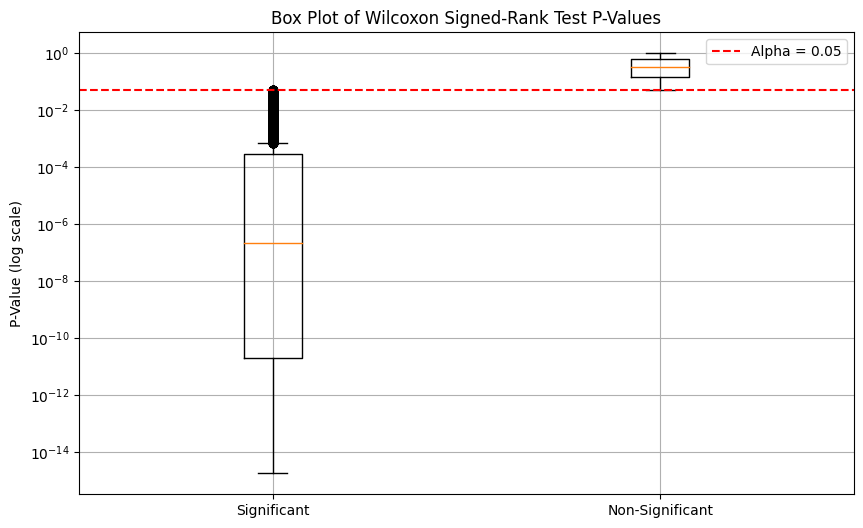

In [16]:
import matplotlib.pyplot as plt


# Extracting p-values for plotting
significant_pvalues = [pvalue for _, _, pvalue in wilcoxon_significant_lung]
non_significant_pvalues = [pvalue for _, _, pvalue in wilcoxon_not_significant_lung]

# Plotting
plt.figure(figsize=(10, 6))
plt.boxplot([significant_pvalues, non_significant_pvalues], labels=['Significant', 'Non-Significant'])
plt.yscale('log')  # Set the y-axis to a logarithmic scale for better visualization
plt.title('Box Plot of Wilcoxon Signed-Rank Test P-Values')
plt.ylabel('P-Value (log scale)')
plt.axhline(y=0.05, color='r', linestyle='--', label='Alpha = 0.05')  # Adding the alpha line
plt.legend()
plt.grid(True)
plt.show()


##### <font color='#9CDCFE'>***Hypothesis Testing Correction & Identifying DEGs***</font>

In [17]:
# Extract the p-values from wilcoxon_significant_lung
p_values = [p_value for _, _, p_value in wilcoxon_significant_lung]

# Perform FDR correction
reject, corrected_p_values, _, _ = multitest.multipletests(p_values, alpha=0.05, method='fdr_bh')

# Update the wilcoxon_significant_lung list with corrected p-values
wilcoxon_significant_lung_corrected = []

for i, gene_data in enumerate(wilcoxon_significant_lung):
    if len(gene_data) >= 3:  # Check if the tuple has at least 3 elements
        gene, test_statistic, p_value = gene_data
        corrected_p_value = corrected_p_values[i]
        wilcoxon_significant_lung_corrected.append((gene, test_statistic, p_value, corrected_p_value))

# Display a sample of differences before and after FDR correction (first 10 genes)
sample_size = 10
table_before = PrettyTable()
table_before.field_names = ["Gene", "Test Statistic", "P-value"]
table_before.add_rows(wilcoxon_significant_lung[:sample_size])
print("Before FDR Correction:")
print(table_before)

table_after = PrettyTable()
table_after.field_names = ["Gene", "P-value (Uncorrected)", "Corrected P-value", "Significant"]
table_after.add_rows([(gene, p_value, corrected_p_value, corrected_p_value < alpha) for gene, _, p_value, corrected_p_value in wilcoxon_significant_lung_corrected[:sample_size]])
print("\nAfter FDR Correction:")
print(table_after)

# Check the number of corrected genes after FDR correction
print(f"\nNumber of DEGs (FDR) of Lung Dataset: {len(wilcoxon_significant_lung_corrected)}")


Before FDR Correction:
+----------+----------------+------------------------+
|   Gene   | Test Statistic |        P-value         |
+----------+----------------+------------------------+
| HIST3H2A |      44.0      | 2.630606843467831e-11  |
|   LXN    |     142.0      | 2.305757291765076e-07  |
|  CNKSR2  |      48.0      | 4.3806736016449577e-11 |
|  SCML1   |     388.0      |  0.01531204751384152   |
|  GSDMD   |     139.0      | 1.8673260271384606e-07 |
|  AKR1C1  |     239.0      | 6.206318512269604e-05  |
| C3orf62  |      55.0      | 4.583913925572416e-08  |
| CRISPLD2 |     146.0      | 3.0412363649645613e-07 |
|  DOCK5   |     189.0      | 4.521505763577238e-06  |
| SLC33A1  |      32.0      | 4.9116266609416925e-12 |
+----------+----------------+------------------------+

After FDR Correction:
+----------+------------------------+------------------------+-------------+
|   Gene   | P-value (Uncorrected)  |   Corrected P-value    | Significant |
+----------+------------------

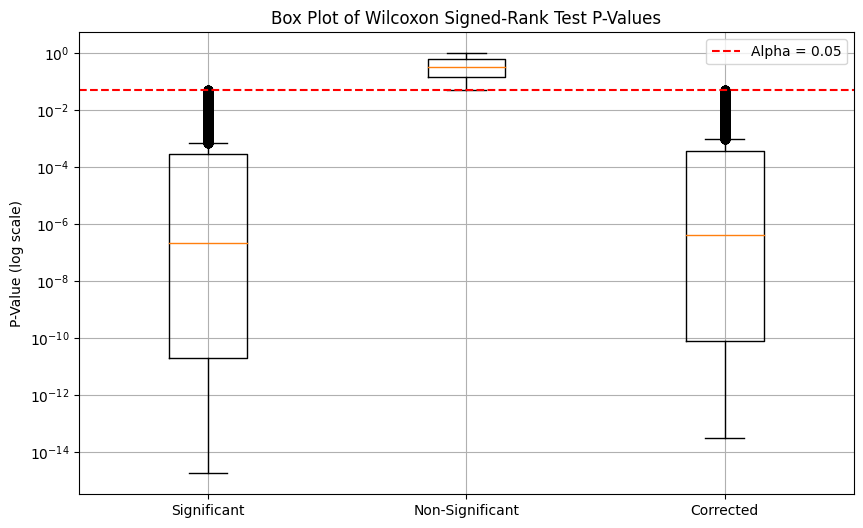

In [18]:
import matplotlib.pyplot as plt

# Extracting p-values for plotting
significant_pvalues = [pvalue for _, _, pvalue in wilcoxon_significant_lung]
non_significant_pvalues = [pvalue for _, _, pvalue in wilcoxon_not_significant_lung]
corrected_pvalues = [corrected_pvalue for _, _, _, corrected_pvalue in wilcoxon_significant_lung_corrected]
# Plotting
plt.figure(figsize=(10, 6))
plt.boxplot([significant_pvalues, non_significant_pvalues,corrected_pvalues], labels=['Significant', 'Non-Significant','Corrected'])
plt.yscale('log')  # Set the y-axis to a logarithmic scale for better visualization
plt.title('Box Plot of Wilcoxon Signed-Rank Test P-Values')
plt.ylabel('P-Value (log scale)')
plt.axhline(y=0.05, color='r', linestyle='--', label='Alpha = 0.05')  # Adding the alpha line

plt.legend()
plt.grid(True)
plt.show()


#### <font color='#DCDC91'>***Case [B]. Samples Are Independent [Wilcoxon: Rank-Sum Test]***</font>
---
* Null Hypothesis (Ho): There is no difference in gene expression between normal and cancerous conditions.
* Alternative Hypothesis (Ha): There is a difference in gene expression between normal and cancerous conditions.


In [19]:
from scipy.stats import ranksums

# Initialize lists to store the test results
wilcoxon_rankSum_significant_lung = []
wilcoxon_rankSum_not_significant_lung = []
alpha = 0.05

def wilcoxon_rank_sum_test(data1, data2, gene, alpha=0.05):
    """
    Performs the Wilcoxon Rank-Sum Test on two datasets.

    Args:
        data1 (array-like): The first dataset to be tested.
        data2 (array-like): The second dataset to be tested.
        gene (str): The name of the gene.
        alpha (float, optional): The significance level for the test. Defaults to 0.05.

    Returns:
        None: Appends the gene name, test statistic, and p-value to the appropriate lists based on the test result.
    """
    # Perform the Wilcoxon Rank-Sum Test
    test_statistic, p_value = ranksums(data1, data2)

    # Check if the p-value is less than the significance level
    if p_value < alpha:
        wilcoxon_rankSum_significant_lung.append((gene, test_statistic, p_value))
        # print(f"{gene}: Significant difference detected (p-value = {p_value:.4f})")
    else:
        wilcoxon_rankSum_not_significant_lung.append((gene, test_statistic, p_value))
        # print(f"{gene}: No significant difference detected (p-value = {p_value:.4f})")

# Applying the Wilcoxon Rank-Sum Test to each gene's data
for gene, normal_data, cancerous_data in zip(allGenes_lung_filtered, normal_genes_filtered, cancerous_genes_filtered):
    wilcoxon_rank_sum_test(normal_data, cancerous_data, gene)

# Check the number of significant genes after the Wilcoxon Rank-Sum Test

print(f"\nNumber of significant genes: {len(wilcoxon_rankSum_significant_lung)}")
print(f"Number of non-significant genes: {len(wilcoxon_rankSum_not_significant_lung)}")



Number of significant genes: 13432
Number of non-significant genes: 3852


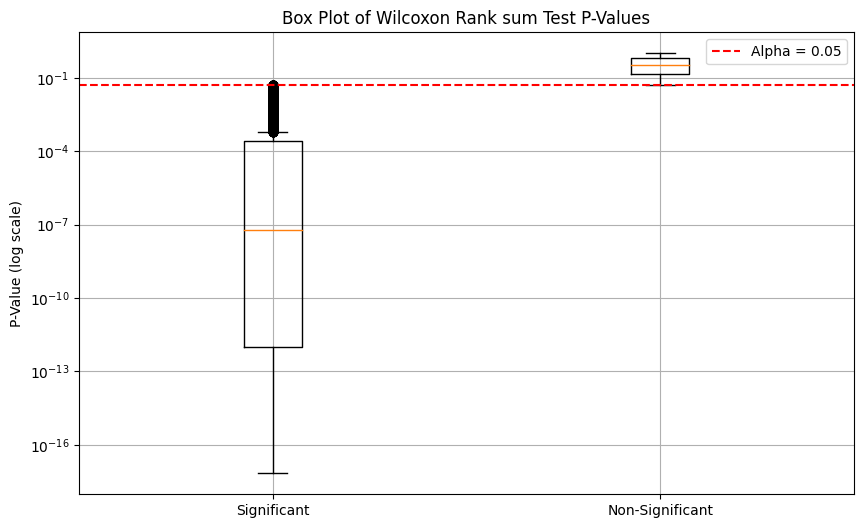

In [20]:
import matplotlib.pyplot as plt


# Extracting p-values for plotting
significant_pvalues = [pvalue for _, _, pvalue in wilcoxon_rankSum_significant_lung]
non_significant_pvalues = [pvalue for _, _, pvalue in wilcoxon_rankSum_not_significant_lung]

# Plotting
plt.figure(figsize=(10, 6))
plt.boxplot([significant_pvalues, non_significant_pvalues], labels=['Significant', 'Non-Significant'])
plt.yscale('log')  # Set the y-axis to a logarithmic scale for better visualization
plt.title('Box Plot of Wilcoxon Rank sum Test P-Values')
plt.ylabel('P-Value (log scale)')
plt.axhline(y=0.05, color='r', linestyle='--', label='Alpha = 0.05')  # Adding the alpha line
plt.legend()
plt.grid(True)
plt.show()


##### <font color='#9CDCFE'>***Hypothesis Testing Correction & Identifying DEGs***</font>

In [21]:
# Extract p-values for FDR correction
p_values = [p_value for _, _, p_value in wilcoxon_rankSum_significant_lung]

# Perform FDR correction
rejected, corrected_p_values, _, _ = multitest.multipletests(p_values, alpha=alpha, method='fdr_bh')

# Filter out non-significant genes after FDR correction
sig_genes_after_fdr = [gene for gene, p_value, corrected_p_value in zip(wilcoxon_rankSum_significant_lung, p_values, corrected_p_values) if corrected_p_value < alpha]

# Display a sample of differences before and after FDR correction (first 10 genes)
sample_size = 10
table_before = PrettyTable()
table_before.field_names = ["Gene", "Test Statistic", "P-value"]
table_before.add_rows(wilcoxon_rankSum_significant_lung[:sample_size])
print("Before FDR Correction:")
print(table_before)

table_after = PrettyTable()
table_after.field_names = ["Gene", "P-value (Uncorrected)", "Corrected P-value", "Significant"]
table_after.add_rows([(gene, p_value, corrected_p_value, corrected_p_value < alpha) for gene, p_value, corrected_p_value in zip(wilcoxon_rankSum_significant_lung[:sample_size], p_values[:sample_size], corrected_p_values[:sample_size])])
print("\nAfter FDR Correction:")
print(table_after)

# Check the number of significant genes after FDR correction
significant_genes_lung = len(sig_genes_after_fdr)
non_significant_genes_lung = len(wilcoxon_rankSum_significant_lung) - significant_genes_lung
print(f"\nNumber of significant genes after FDR correction: {significant_genes_lung}")

Before FDR Correction:
+----------+---------------------+------------------------+
|   Gene   |    Test Statistic   |        P-value         |
+----------+---------------------+------------------------+
| HIST3H2A |  -6.607726350625643 | 3.902672133619676e-11  |
|   LXN    |  5.225515465596492  | 1.7367060308128698e-07 |
|  CNKSR2  |  7.059271552468084  | 1.6737769947512687e-12 |
|  SCML1   |  2.8471476085637875 | 0.0044112902964078245  |
|  GSDMD   |   5.08419215814962  | 3.691940242005681e-07  |
|  AKR1C1  |  -2.681695931552817 |  0.007325000570549675  |
| C3orf62  |  5.890769083578103  | 3.844023868601481e-09  |
| CRISPLD2 |  4.281062142658867  | 1.8600340349607372e-05 |
|  DOCK5   |  5.766680325819875  |  8.08481971897097e-09  |
| SLC33A1  | -6.5904918009369995 | 4.383720091149535e-11  |
+----------+---------------------+------------------------+

After FDR Correction:
+---------------------------------------------------------+------------------------+------------------------+-----

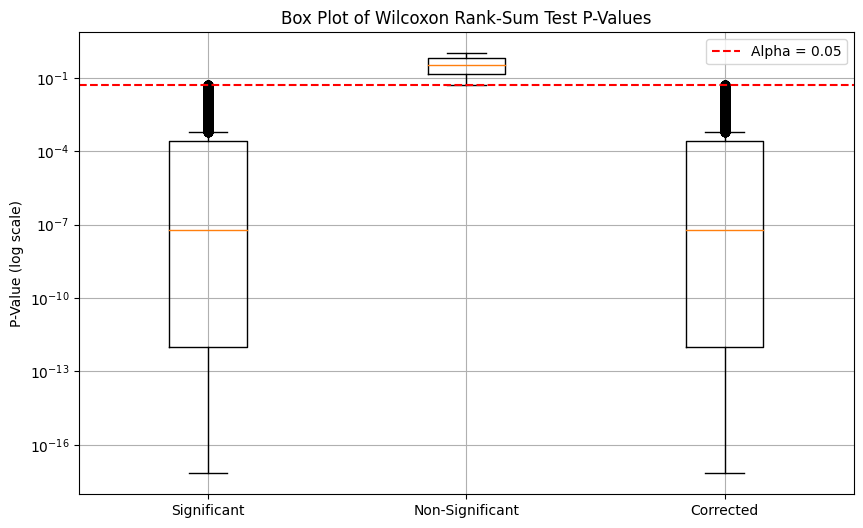

In [22]:
import matplotlib.pyplot as plt

# Extracting p-values for plotting
significant_pvalues = [pvalue for _, _, pvalue in wilcoxon_rankSum_significant_lung]
non_significant_pvalues = [pvalue for _, _, pvalue in wilcoxon_rankSum_not_significant_lung]
corrected_pvalues = [corrected_pvalue for _, _, corrected_pvalue in sig_genes_after_fdr]
# Plotting
plt.figure(figsize=(10, 6))
plt.boxplot([significant_pvalues, non_significant_pvalues,corrected_pvalues], labels=['Significant', 'Non-Significant','Corrected'])
plt.yscale('log')  # Set the y-axis to a logarithmic scale for better visualization
plt.title('Box Plot of Wilcoxon Rank-Sum Test P-Values')
plt.ylabel('P-Value (log scale)')
plt.axhline(y=0.05, color='r', linestyle='--', label='Alpha = 0.05')  # Adding the alpha line

plt.legend()
plt.grid(True)
plt.show()


### <font color='#f5beb4'>***B. Using Fold Change***</font>

In [37]:
import numpy as np

# Initialize a list to store the log2 fold change values
fc_values = []
non_significant_fc = []
significant_fc = []
all_genes_fc=[]
# Iterate through the genes
for gene, expression_data in exprLung_data_filteredGenes.items():
    # Get the normal and cancerous expression levels
    normal_levels = expression_data['Normal']
    cancerous_levels = expression_data['Cancerous']

    # Add a small constant to both numerator and denominator to avoid division by zero to avoid infinity log2 FC
    epsilon = 1e-8
    normal_levels = np.where(normal_levels == 0, epsilon, normal_levels)
    cancerous_levels = np.where(cancerous_levels == 0, epsilon, cancerous_levels)

    # Calculate the log2 fold change values
    values = np.log2(np.divide(cancerous_levels, normal_levels))

    # Add the gene to the appropriate list based on a threshold
    threshold = np.log2(1.5)
    if abs(np.mean(values)) < threshold:
        non_significant_fc.append((gene,np.mean(values)))
        all_genes_fc.append((gene,np.mean(values)))
    else:
        significant_fc.append((gene,np.mean(values)))
        all_genes_fc.append((gene,np.mean(values)))

print("Number of DEGS by FC",len(significant_fc))
# Print the first five lists
# Define the table
table = PrettyTable()
table.field_names = ["Gene", "log2 FC"]

# Populate the table with the first five genes and their differences
for gene, values in significant_fc[:5]:
    table.add_row([gene, values])

# Print the table
print(table)


Number of DEGS by FC 9622
+----------+---------------------+
|   Gene   |       log2 FC       |
+----------+---------------------+
| HIST3H2A |  1.997842000344549  |
|   LXN    |  -1.049259479678013 |
|  CNKSR2  | -2.7530528221399155 |
|  GSDMD   | -0.5890322361112205 |
|  AKR1C1  |  1.4709092378759399 |
+----------+---------------------+


In [24]:
# Extract gene names from both sets
genes_wilcoxon = set(gene for gene, _, _, _ in wilcoxon_significant_lung_corrected)
genes_fc = set(gene for gene, _ in significant_fc)

# Find common genes
common_genes = genes_wilcoxon.intersection(genes_fc)

print(len(common_genes))

# Create dictionaries to store corrected p-values and log2 fold change values for common genes
common_genes_data = {}

# Populate dictionaries with data
for gene_wilcoxon in wilcoxon_significant_lung_corrected:
    gene, _, _, corrected_p_value = gene_wilcoxon

    # Check if the gene is also in the log2 fold change set
    fc_data = next((data for data in significant_fc if data[0] == gene), None)

    if fc_data:
        _, fc_values = fc_data

        # Add data to the dictionary
        common_genes_data[gene] = {"corrected_p_value": corrected_p_value, "log2_fold_change": fc_values}

# Print the common genes and their data
table_common_genes = PrettyTable()
table_common_genes.field_names = ["Gene", "Corrected P-value", "Log2 Fold Change"]

for gene, data in common_genes_data.items():
    table_common_genes.add_row([gene, data["corrected_p_value"], data["log2_fold_change"]])

print("Common Genes and Their Data:")
print(table_common_genes[:5])

8899
Common Genes and Their Data:
+----------+------------------------+---------------------+
|   Gene   |   Corrected P-value    |   Log2 Fold Change  |
+----------+------------------------+---------------------+
| HIST3H2A | 1.0199892100020051e-10 |  1.997842000344549  |
|   LXN    | 4.570175624824629e-07  |  -1.049259479678013 |
|  CNKSR2  | 1.6305028038176014e-10 | -2.7530528221399155 |
|  GSDMD   | 3.7511969162083177e-07 | -0.5890322361112205 |
|  AKR1C1  | 9.002594094407992e-05  |  1.4709092378759399 |
+----------+------------------------+---------------------+


In [25]:
import csv


# Specify the file path for the CSV file
csv_file_path = '/content/common_genes_data.csv'

# Open the CSV file in write mode
with open(csv_file_path, 'w', newline='') as csv_file:
    # Create a CSV writer object
    csv_writer = csv.writer(csv_file)

    # Write the header row
    csv_writer.writerow(["Gene", "Corrected P-value", "Log2 Fold Change"])

    # Write data rows
    for gene, data in common_genes_data.items():
        csv_writer.writerow([gene, data["corrected_p_value"], data["log2_fold_change"]])

# Print the path of the generated CSV file
print(f"CSV file generated: {csv_file_path}")


CSV file generated: /content/common_genes_data.csv


In [26]:
from google.colab import files

# Specify the file path for the CSV file
csv_file_path = '/content/common_genes_data.csv'

# Trigger the download of the CSV file
files.download(csv_file_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [27]:
import pandas as pd
import numpy as np
from google.colab import files

# Read the CSV file into a DataFrame
df = pd.read_csv('/content/common_genes_data.csv')

# Assuming the dictionary with the required values is named common_genes_data

# Add a "Ranking" column to the DataFrame
df['Ranking'] = -np.log10(df['Corrected P-value']) * df['Log2 Fold Change']

# Sort the DataFrame by the "Ranking" column in descending order
df_sorted = df.sort_values(by='Ranking', ascending=False).reset_index(drop=True)

df_sorted


,Gene,Corrected P-value,Log2 Fold Change,Ranking
0,RAET1L,3.094053e-14,17.500777,236.426266
1,GABRA3,8.384730e-14,15.031537,196.560053
2,USH1G,1.475005e-13,14.792203,189.801816
3,SPERT,4.052490e-13,15.287363,189.445257
4,BARX1,1.475005e-13,14.492545,185.956834
...,...,...,...,...
8894,RBP2,3.094053e-14,-15.441095,-208.601050
8895,TMEM252,8.384730e-14,-16.136356,-211.007235
8896,AGBL1,3.094053e-14,-15.942081,-215.369096
8897,PLA2G12B,4.202003e-14,-16.168841,-216.283211


In [28]:
ranking = df_sorted[['Gene', 'Ranking']]
ranking

,Gene,Ranking
0,RAET1L,236.426266
1,GABRA3,196.560053
2,USH1G,189.801816
3,SPERT,189.445257
4,BARX1,185.956834
...,...,...
8894,RBP2,-208.601050
8895,TMEM252,-211.007235
8896,AGBL1,-215.369096
8897,PLA2G12B,-216.283211


In [32]:
!pip install gseapy

import gseapy as gp

gp.get_library_name()
# pre_res = gp.prerank(rnk='ranking', gene_sets='Cancer_Cell_Line_Encyclopedia', seed=6, permutation_num=100)
pre_res = gp.prerank(rnk = ranking, gene_sets = 'Cancer_Cell_Line_Encyclopedia', seed = 6, permutation_num = 100)
pre_res
out = []

for term in list(pre_res.results):
    out.append([term,
               pre_res.results[term]['fdr'],
               pre_res.results[term]['es'],
               pre_res.results[term]['nes']])

out_df = pd.DataFrame(out, columns = ['Term','fdr', 'es', 'nes']).sort_values('fdr').reset_index(drop = True)
out_df

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 7.1 MB/s eta 0:00:00


,Term,fdr,es,nes
0,UT7 HAEMATOPOIETIC AND LYMPHOID TISSUE,0.000000,-0.604149,-2.165743
1,PL21 HAEMATOPOIETIC AND LYMPHOID TISSUE,0.000000,-0.588667,-2.131131
2,HEL HAEMATOPOIETIC AND LYMPHOID TISSUE,0.000000,-0.588738,-2.086632
3,YD10B UPPER AERODIGESTIVE TRACT,0.000000,0.739606,2.528415
4,OCIAML2 HAEMATOPOIETIC AND LYMPHOID TISSUE,0.000000,-0.558027,-2.002494
...,...,...,...,...
950,NAMALWA HAEMATOPOIETIC AND LYMPHOID TISSUE,0.905835,-0.239341,-0.735887
951,SNU489 CENTRAL NERVOUS SYSTEM,0.924121,-0.220387,-0.715977
952,LCLC103H LUNG,0.951067,-0.255146,-0.680541
953,EBC1 LUNG,0.963257,0.210347,0.686887


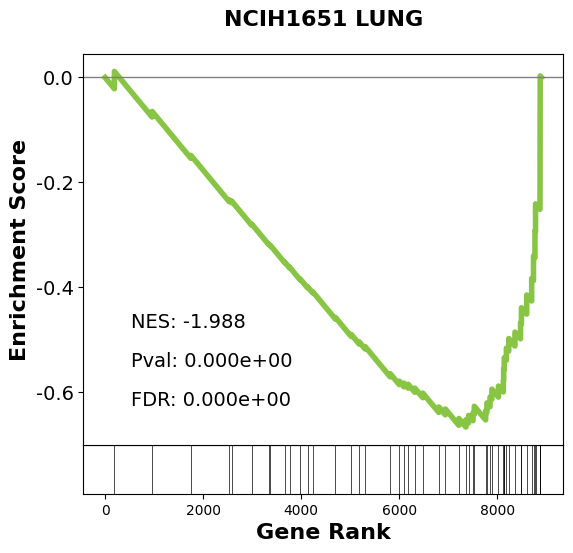

In [33]:
from gseapy.plot import gseaplot

# Specify the gene set term you want to visualize
gene_set_term = "NCIH1651 LUNG"

# Plot the GSEA results for the specific gene set term "NCIH1651 LUNG"
gseaplot(ranks=pre_res.ranking, term=gene_set_term, **pre_res.results[gene_set_term])

# Show the plot
plt.show()

### <font color='#f5beb4'>***C. Using Volcano Plots {hena hastakhdem men elhypothesis testing method elpaired method case}***</font>

In [38]:
import numpy as np

# Create a dictionary for log2 fold change values with genes as keys
fc_dict = dict(all_genes_fc)

# Initialize a list to store corrected p and log2 fold change values
volcano_data = []

# Iterate through the genes with corrected p-values
for gene, _, p_value, corrected_p_value in wilcoxon_significant_lung_corrected:
    # Find the log2 fold change values for the gene using the dictionary
    if gene in fc_dict:
        values = fc_dict[gene]
        # Append gene, corrected p-value, and log2 fold change to the list
        volcano_data.append((gene, corrected_p_value, values))

# Print the first few rows of the volcano data
for gene, corrected_p_value, log2_fold_change in volcano_data[:10]:
    print(f"Gene: {gene}, Corrected P-value: {corrected_p_value}, Log2 Fold Change: {log2_fold_change}")


Gene: HIST3H2A, Corrected P-value: 1.0199892100020051e-10, Log2 Fold Change: 1.997842000344549
Gene: LXN, Corrected P-value: 4.570175624824629e-07, Log2 Fold Change: -1.049259479678013
Gene: CNKSR2, Corrected P-value: 1.6305028038176014e-10, Log2 Fold Change: -2.7530528221399155
Gene: SCML1, Corrected P-value: 0.016466698254896536, Log2 Fold Change: -0.4442012141241383
Gene: GSDMD, Corrected P-value: 3.7511969162083177e-07, Log2 Fold Change: -0.5890322361112205
Gene: AKR1C1, Corrected P-value: 9.002594094407992e-05, Log2 Fold Change: 1.4709092378759399
Gene: C3orf62, Corrected P-value: 1.005559471669108e-07, Log2 Fold Change: -0.728314857120811
Gene: CRISPLD2, Corrected P-value: 5.927818571197863e-07, Log2 Fold Change: -1.1424165697300674
Gene: DOCK5, Corrected P-value: 7.5747254351124255e-06, Log2 Fold Change: -0.811801569978122
Gene: SLC33A1, Corrected P-value: 2.2010998272501516e-11, Log2 Fold Change: 0.7729199919237952


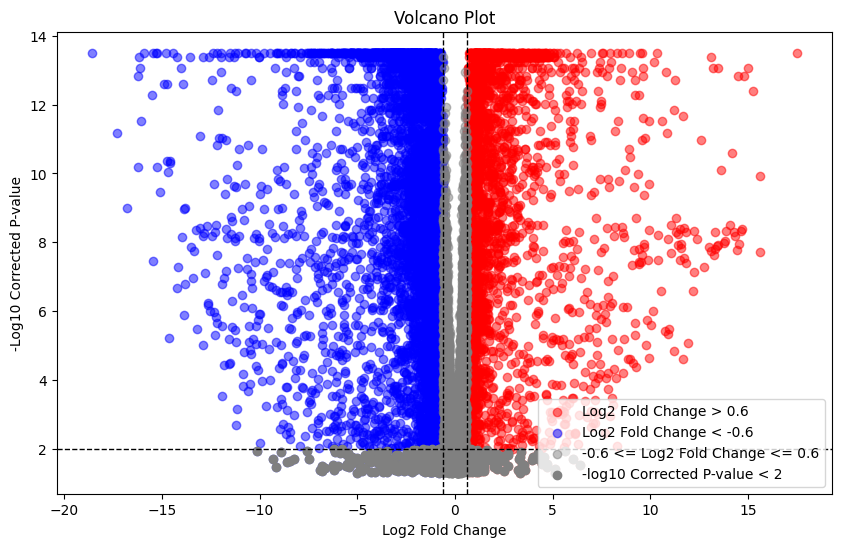

In [41]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have the 'volcano_data' list from the previous code

# Unpack the data for plotting
genes, corrected_p_values, log2_fold_changes = zip(*volcano_data)

# Set a significance threshold (you can adjust this)
significance_threshold = 0.05

# Determine the direction of log2 fold change
# total_indices=[i for i, p_value in enumerate(-np.log10(corrected_p_values))]
left_indices = [i for i, fold_change in enumerate(log2_fold_changes) if fold_change > 0.6]
right_indices = [i for i, fold_change in enumerate(log2_fold_changes) if fold_change < -0.6]
gray_indices = [i for i, fold_change in enumerate(log2_fold_changes) if -0.6 < fold_change < 0.6]
low_p_value_indices = [i for i, p_value in enumerate(-np.log10(corrected_p_values)) if p_value < 2]

# Plot the volcano plot
plt.figure(figsize=(10, 6))
# plt.scatter(np.array(log2_fold_changes)[total_indices], -np.log10(np.array(corrected_p_values)[total_indices]), c='black', label='Log2 Fold Change > 0.6', alpha=1)
# Plot left points in red
plt.scatter(np.array(log2_fold_changes)[left_indices], -np.log10(np.array(corrected_p_values)[left_indices]), c='red', label='Log2 Fold Change > 0.6', alpha=0.5)

# Plot right points in blue
plt.scatter(np.array(log2_fold_changes)[right_indices], -np.log10(np.array(corrected_p_values)[right_indices]), c='blue', label='Log2 Fold Change < -0.6', alpha=0.5)

# Plot gray points between -1 and 1 in gray
plt.scatter(np.array(log2_fold_changes)[gray_indices], -np.log10(np.array(corrected_p_values)[gray_indices]), c='gray', label='-0.6 <= Log2 Fold Change <= 0.6', alpha=0.5)

# Highlight points with -log10(corrected p-values) below 2 in gray
plt.scatter(np.array(log2_fold_changes)[low_p_value_indices], -np.log10(np.array(corrected_p_values)[low_p_value_indices]), c='gray', label='-log10 Corrected P-value < 2', alpha=1)
# Add dashed lines to separate regions
plt.axvline(x=-0.6, color='k', linestyle='--', linewidth=1)
plt.axvline(x=0.6, color='k', linestyle='--', linewidth=1)
plt.axhline(y=2, color='k', linestyle='--', linewidth=1)

# Add labels and title
plt.xlabel('Log2 Fold Change')
plt.ylabel('-Log10 Corrected P-value')
plt.title('Volcano Plot')
plt.legend()

# Show the plot
plt.show()


## <font color='#097770'>***VII. Exporting The Results***</font>

In [ ]:
# # Define the path for the CSV file
# csv_path = 'corrected-wilcoxon-significant-lung.csv'

# # Write wilcoxon_significant_lung to the CSV file
# with open(csv_path, 'w', newline='') as csvfile:
#     fieldnames = ['Gene', 'Test Statistic', 'p-value', 'Adjusted p-value']
#     writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
#     writer.writeheader()

#     for gene, test_statistic, p_value, adj_p_value in wilcoxon_significant_lung:
#         writer.writerow({'Gene': gene, 'Test Statistic': test_statistic, 'p-value': p_value, 'Adjusted p-value': adj_p_value})

# # Define the path for the TXT file
# txt_path = 'wilcoxon-significant-lung.txt'

# # Write wilcoxon_significant_lung to the TXT file
# with open(txt_path, 'w') as txtfile:
#     for gene, test_statistic, p_value, adj_p_value in wilcoxon_significant_lung:
#         txtfile.write(f"Gene: {gene}, Test Statistic: {test_statistic}, p-value: {p_value}, Adjusted p-value: {adj_p_value}\n")

# print("Exported wilcoxon_significant_lung as CSV and TXT files.")